In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC,LinearSVC,NuSVC
from sklearn.datasets import load_iris
%matplotlib inline

iris = load_iris()
X = iris.data[:, :2]
y = iris.target

In [9]:
h = .02
C = 1.0

svc = SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = LinearSVC(C=C).fit(X, y)
nu_svc = NuSVC().fit(X,y)


C:\Users\painc\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


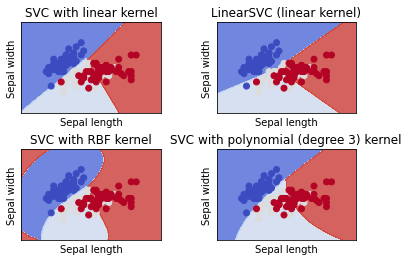

In [8]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])